<a href="https://colab.research.google.com/github/annosi/python-starter-codes/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Free Code Camp Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use Pandas to import the data from epa-sea-level.csv.

In [ ]:
#importing from system to colab
from google.colab import files
uploaded = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


In [ ]:
#converting csv to pandas dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['epa-sea-level.csv']))
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

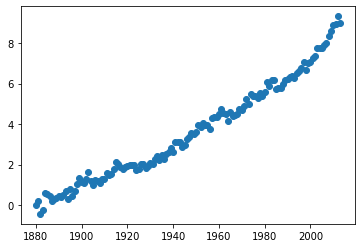

In [ ]:
#simple scatterplot
x = df['Year']
y= df['CSIRO Adjusted Sea Level']

plt.scatter(x,y)

Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050. The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [ ]:
#determining slope and intercept of line of best fit
from scipy import stats
slope, intercept, r, p, se = stats.linregress(x,y)
print("slope= ",slope)
print("intercept= ", intercept)

slope=  0.0630445840121348
intercept=  -119.06594196773978


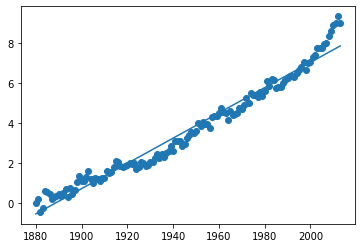

In [ ]:
#plotting line of best fit
z = intercept + slope*x
plt.scatter(x,y)
plt.plot(x,z,label='line of best fit')

In [ ]:
#added year 2050 to data with y value calculated using line of best fit equation
predict_x = 2050
predict_y = (slope*predict_x)+intercept
df2 = {'Year':2050,'CSIRO Adjusted Sea Level':predict_y,'Lower Error Bound':0,'Upper Error Bound':0,'NOAA Adjusted Sea Level':0}
df =df.append(df2,ignore_index=True)
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
130,2010.0,8.901575,8.618110,9.185039,8.122973
131,2011.0,8.964567,8.661417,9.267717,8.053065
132,2012.0,9.326772,8.992126,9.661417,8.457058
133,2013.0,8.980315,8.622047,9.338583,8.546648
134,2050.0,10.175455,0.000000,0.000000,0.000000


In [ ]:
#converting year column back to int
df['Year']=df['Year'].astype(int)
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648
134,2050,10.175455,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Rise in Sea Level')

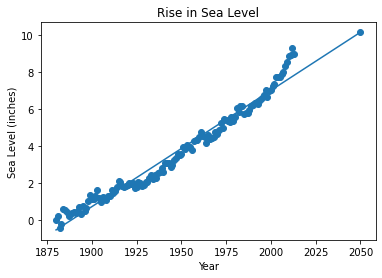

In [ ]:
#calculated new equation for line of best fit then plotted again to get value for 2050
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
slope, intercept, r, p, se = stats.linregress(x,y)
m = intercept + slope*x
plt.scatter(x,y)
plt.plot(x,m)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')